# Sales Prediction 

In [3]:
#Import all Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('dataset/Advertising.csv')

In [5]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
data.shape

(200, 4)

In [9]:
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Exploratary Data Analysis 

Text(0.5, 1.0, 'TV vs SALES')

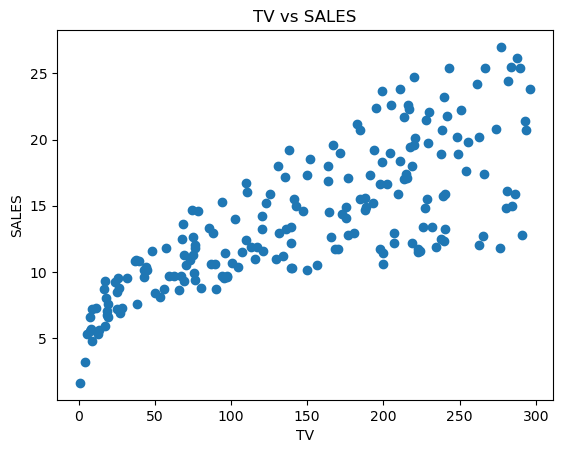

In [13]:
plt.scatter(x=data['TV'], y=data['Sales'])
plt.xlabel('TV')
plt.ylabel('SALES')
plt.title('TV vs SALES')

Text(0.5, 1.0, 'Radio vs SALES')

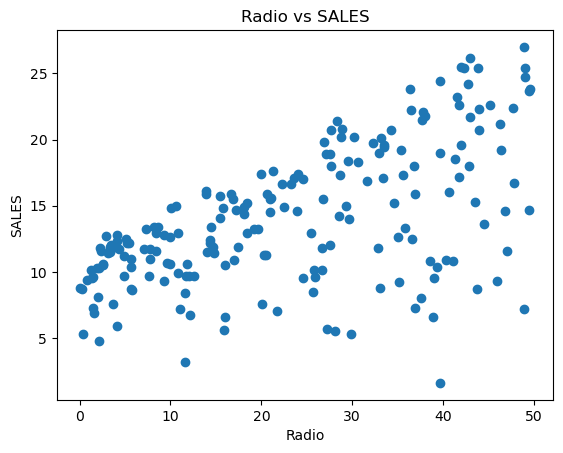

In [14]:
plt.scatter(x=data['Radio'], y=data['Sales'])
plt.xlabel('Radio')
plt.ylabel('SALES')
plt.title('Radio vs SALES')

Text(0.5, 1.0, 'NEWS PAPER vs SALES')

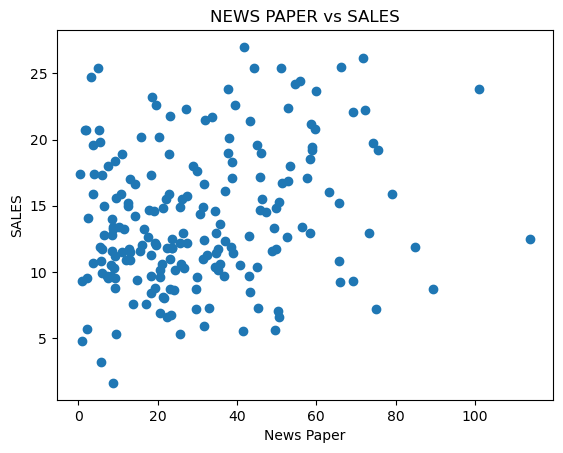

In [15]:
plt.scatter(x=data['Newspaper'], y=data['Sales'])
plt.xlabel('News Paper')
plt.ylabel('SALES')
plt.title('NEWS PAPER vs SALES')

<Axes: >

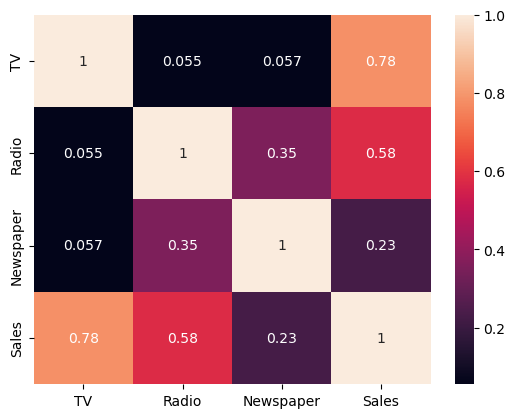

In [18]:
sns.heatmap(data.corr(), annot=True)

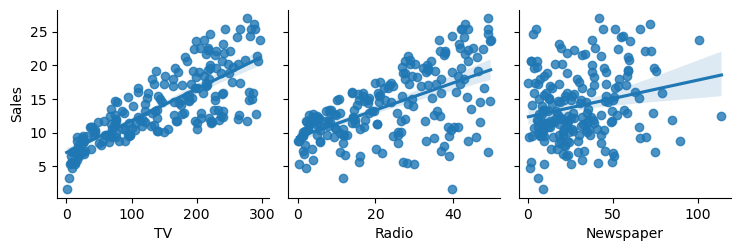

In [20]:
sns.pairplot(data, kind='reg', x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

### Outlier Removal 

In [31]:
def removeoutlier(values):
    Q1 = data[values].quantile(0.25)
    Q3 = data[values].quantile(0.75)
    
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    upper_array = np.where(data[values]>=upper)[0]
    lower_array = np.where(data[values]<=lower)[0]
    mean = data[((data[values]>=lower)|(data[values]<= upper))][values].mean()
    data.loc[((data[values]<lower)|(data[values]>upper)), values]=mean

In [32]:
for i in data.columns:
    removeoutlier(i)

### Model Building 

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

In [34]:
x = data.drop('Sales', axis=1)
y = data['Sales']

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [48]:
xtrain.shape, ytrain.shape

((160, 3), (160,))

In [49]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [74]:
ypred = lr.predict(xtest)

In [67]:
lr.coef_

array([ 0.04457255,  0.19679421, -0.00360991])

In [68]:
lr.intercept_

3.0130400469164798

In [69]:
rmse = np.sqrt(mean_absolute_error(ytest, ypred))
r2 = r2_score(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)

In [70]:
print(f'MAE: {mae}')
print(f'RMSE: {mse}')
print(f'r-squared: {r2}')

MAE: 1.3664545609285201
RMSE: 1.1689544734199533
r-squared: 0.8597062157589124


In [71]:
values = pd.DataFrame({
    'Actual Value' : ytest,
    'Predicted Value' : ypred
})
values

,Actual Value,Predicted Value
18,11.3,10.065680
170,8.4,7.458058
107,8.7,7.017687
98,25.4,24.065274
177,11.7,12.007213
182,8.7,6.532530
5,7.2,12.753315
146,13.2,15.120100
12,9.2,10.743450
152,16.6,16.354620
